In [228]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("clean_data.csv")      # Daten einladen

df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,zeit,temperatur,feuchtigkeit,licht
0,2025-05-28 15:21:24,24.9,46,1980
1,2025-05-28 15:21:34,25.0,46,2029
2,2025-05-28 15:21:49,25.0,45,2023
3,2025-05-28 15:22:15,25.1,45,2049
4,2025-05-28 15:22:25,25.1,44,2055
...,...,...,...,...
312366,2025-07-16 12:31:24,27.1,45,486
312367,2025-07-16 12:31:50,27.2,44,488
312368,2025-07-16 12:32:03,27.1,44,498
312369,2025-07-16 12:32:15,27.1,44,491


In [229]:
feature_names = ['temperatur', 'feuchtigkeit', 'licht']

X = df[feature_names]


print(f"Originaldaten: \n\n {X.head()}")

Originaldaten: 

    temperatur  feuchtigkeit  licht
0        24.9            46   1980
1        25.0            46   2029
2        25.0            45   2023
3        25.1            45   2049
4        25.1            44   2055


In [230]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) # Standardskaliert für jeden Werte z = (x - mean) / std

scaled_df = pd.DataFrame(X_scaled, columns=['temperatur', 'feuchtigkeit', 'licht'])


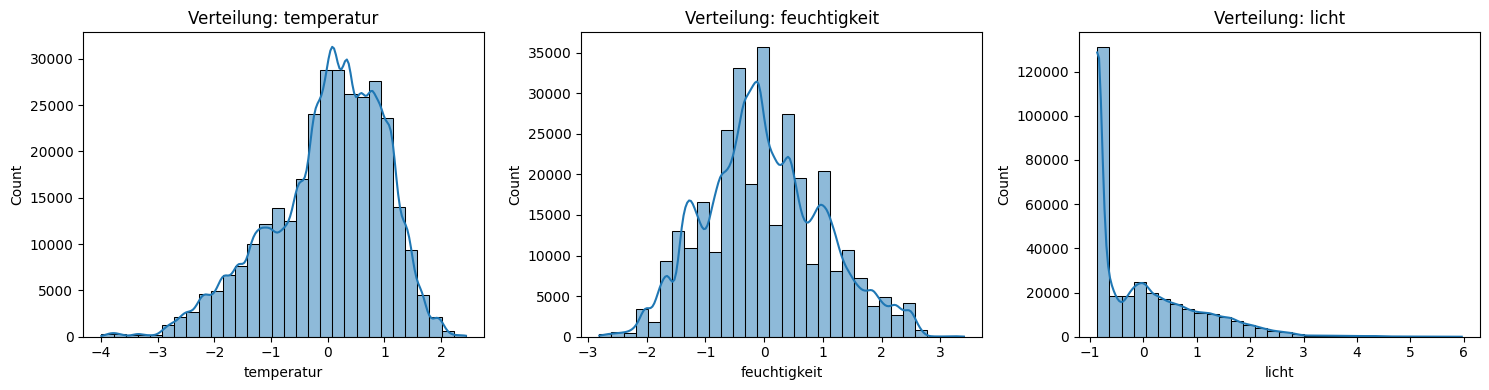

In [231]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], bins=30, ax=axs[i], kde=True)
    axs[i].set_title(f"Verteilung: {col}")
plt.tight_layout()
plt.show()

p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \Sigma_k)

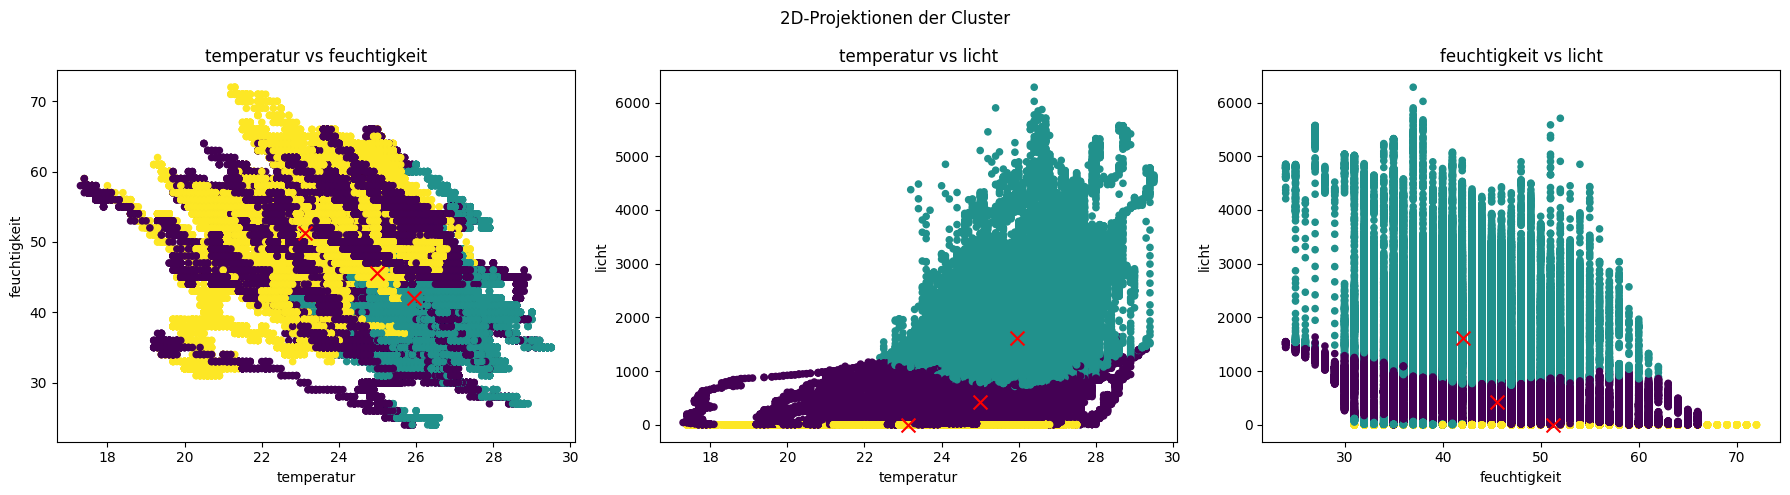

In [232]:
n_components = 3

random_state = 42

gmm = GaussianMixture(n_components=n_components, random_state=random_state, n_init=3)

gmm.fit(X_scaled)       # EM-Verfahren

labels = gmm.predict(X_scaled)

X_original = scaler.inverse_transform(X_scaled)

center_originals = scaler.inverse_transform(gmm.means_)

from data_gmm import *

#plot_3d_clusters(X=X_original, labels=labels, centers=center_originals, feature_names=feature_names)

plot_2d_projections(X=X_original, labels=labels, centers=center_originals, feature_names=feature_names)

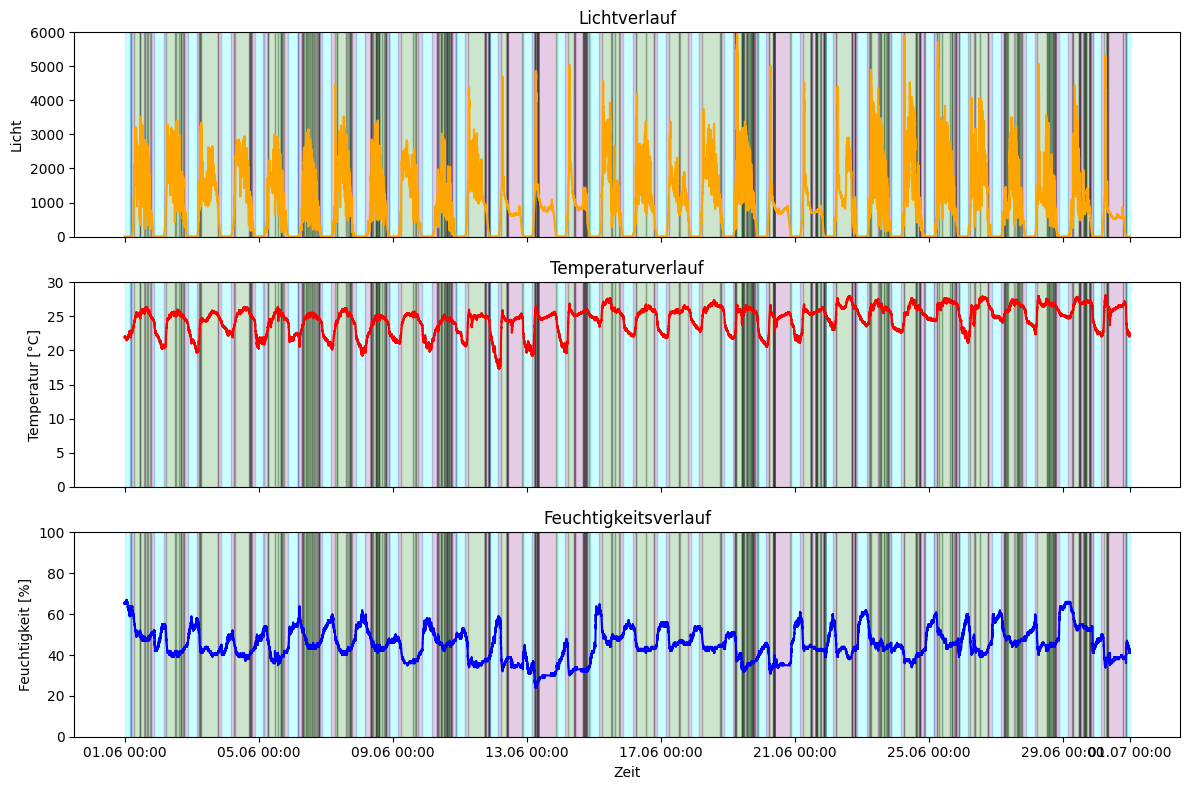

In [233]:
df_clustered = df.copy()

df_clustered['cluster'] = labels

plots(df_clustered, 
      startdatum="2025-06-01", 
      tage=30,temperatur_limits=(0,30),feuchtigkeit_limits=(0,100),licht_limits=(0,6000),
      cluster_column='cluster',
      cluster_colors={0: 'purple', 1: 'green', 2: 'cyan'})